# Use Case 2: Comparing Clinical Data

<b>This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select particular variables for analysis, and represent interactions between those variables in a meaningful way. As before, we will use enometrial cancer data from the Clinical Proteomic Tumor Analysis Consortium, but we will compare FIGO stage--a common measurement of uterine cancer stage (see the <a href="https://www.ncbi.nlm.nih.gov/books/NBK269617/">NIH</a> for more information)--with BMI to see if there is any correllation.

We will start as we did last time by importing the standard data analysis libraries, plus the seaborn library for visualization.</b>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

<b>Once again, we import the CPTAC package for both the data itself and the API to access it.</b>

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


<b>The dataframe for clinical results can be retrieved from CPTAC by calling the <code><big><font color=blue>get_clinical</font></big></code> method. We can then refine the data by selecting only the variables we are interested in; in this case, FIGO stage and BMI.</b>

In [3]:
clinical_data = CPTAC.get_clinical()
fsb = clinical_data[['FIGO_stage', 'BMI']]

<b>For the purposes of this example, we want to organize the FIGO stages solely by their roman numeral numbers. Since the data comes organized with subcategories, we will need to rename them manually.</b>

In [4]:
pd.set_option('mode.chained_assignment', None)
fsb.loc[fsb.FIGO_stage == 'IA', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IB', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IIIA', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIB', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC1', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC2', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IVB', 'FIGO_stage'] = 'IV'
figo_stage_bmi = fsb.sort_values('FIGO_stage')

<b>Since FIGO stage is categorical, it is easy to visualize each one in a histogram to examine the number of people with each FIGO score who have a given BMI.</b>

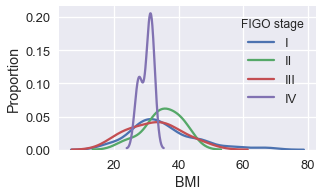

In [6]:
sns.set(style='darkgrid', context="talk")
NUM_COLORS = 12

figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, aspect=1.5)
figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist.set(ylabel='Proportion')
plt.show()

<b>Finally, we can use a box plot to analyze the data and see if there seems to be any overall correlation between FIGO stage and BMI. In this example, we add a strip plot over the box plot to visualize the underlying data.</b>

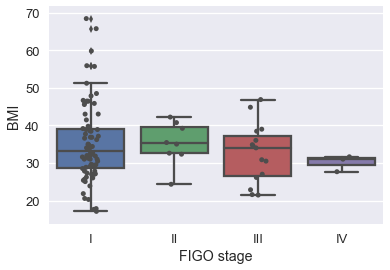

In [7]:
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI")
figoStrip = sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

<b>The same technique will work for visualizing any other variables in this dataset. As another example, use the following code to create a similar box plot to examine the BMI of research subjects based on diagnosis of diabetes. Once again, we select the variables of interest from the clinical dataframe, then plot the resulting dataframe using the seaborn package.</b>

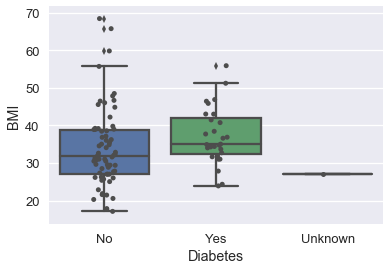

In [8]:
diabetes_bmi = clinical_data[['Diabetes', 'BMI']]
figoStrip = sns.boxplot(data=diabetes_bmi, x="Diabetes", y="BMI")
figoStrip = sns.stripplot(data=diabetes_bmi, x="Diabetes", y="BMI", jitter=True, color=".3")
plt.show()